In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #ez hogy a rákban nem a defaultja a jupyternek?

# saját függvényeink
from functions import *

In [2]:
monthly_bipartite = acquireSplitData()
projected_graph = listMEPs()

In [3]:
months = []
for month in monthly_bipartite:
    nxgraph = nx.from_pandas_edgelist(month, source='AmendmentID', target='MEPName')
    meps = pd.unique(month['MEPName'])
    #print(nx.algorithms.bipartite.projected_graph(nxgraph, meps).nodes)
    months.append(nx.algorithms.bipartite.projected_graph(nxgraph, meps))

Our measure of cohesiveness will be a percentage of how many edges are present inside the group out of the possible `n choose 2` edges.

In [ ]:
monthly_cohesiveness_by_party = []
for month in months:
    curr = {}
    monthly_meps = set(projected_graph) & set(pd.unique(month.nodes))
    for party in listPoliticalGroups():
        partymeps = set(listMEPs_by_polgroup(party)) & monthly_meps
        H = nx.induced_subgraph(month, partymeps)
        n = H.number_of_nodes()
        e = H.number_of_edges()
        if n in [0,1]:
            curr[party] = 0
        else:
            curr[party] = (2*e)/(n*(n-1)) ## proportion of edges
    monthly_cohesiveness_by_party.append(curr)
monthly_cohesiveness_by_party = pd.DataFrame(monthly_cohesiveness_by_party)
print(monthly_cohesiveness_by_party)


In [10]:
monthly_cohesiveness_by_country = []
for month in months:
    curr = {}
    monthly_meps = set(projected_graph) & set(pd.unique(month.nodes))
    for country in listCountries():
        countrymeps = set(listMEPs_by_country(country)) & monthly_meps
        H = nx.induced_subgraph(month, countrymeps)
        n = H.number_of_nodes()
        e = H.number_of_edges()
        if n in [0,1]:
            curr[country] = 0
        else:
            curr[country] = (2*e)/(n*(n-1)) ## proportion of edges
    monthly_cohesiveness_by_country.append(curr)
monthly_cohesiveness_by_country = pd.DataFrame(monthly_cohesiveness_by_country)
print(monthly_cohesiveness_by_country)

     Czechia    Poland    France  Netherlands  Slovakia   Romania     Spain  \
0   0.000000  0.133333  0.036364     0.000000  0.000000  0.200000  0.400000   
1   0.000000  0.000000  0.022222     0.000000  0.000000  0.500000  0.000000   
2   0.000000  0.123810  0.063158     0.000000  0.000000  0.090909  0.076190   
3   0.000000  0.089744  0.026210     0.047619  0.000000  0.027778  0.051471   
4   0.047619  0.070175  0.030252     0.030303  0.047619  0.000000  0.036232   
5   0.047619  0.054945  0.032020     0.000000  0.000000  0.000000  0.017544   
6   0.000000  0.090000  0.022222     0.025641  0.000000  0.120879  0.028986   
7   0.090909  0.155303  0.040244     0.038095  0.111111  0.248366  0.039886   
8   0.181818  0.083333  0.032258     0.044444  0.083333  0.076023  0.057143   
9   0.000000  0.050000  0.034535     0.025000  0.333333  0.171429  0.036559   
10  0.016667  0.065539  0.033566     0.043478  0.045455  0.113333  0.091582   
11  0.008333  0.028571  0.053940     0.009524  0.200

In [11]:
monthly_cohesiveness_by_party.to_csv("results/monthly_cohesiveness_by_party.csv")
monthly_cohesiveness_by_country.to_csv("results/monthly_cohesiveness_by_country.csv")

TODO: create nice-looking diagrams of this

TODO: do the same analysis on a per country basis

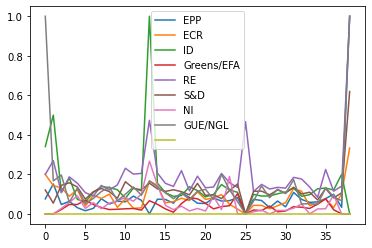

In [12]:
monthly_cohesiveness_by_party.plot()
plt.show()

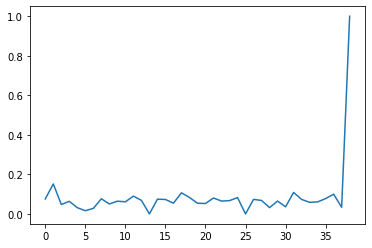

In [16]:
monthly_cohesiveness_by_party["EPP"].plot()
plt.show()

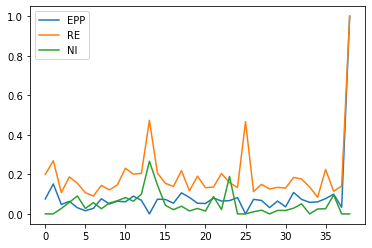

In [18]:
monthly_cohesiveness_by_party[["EPP", "RE", "NI"]].plot()
plt.show()

valami történt 2020 szeptemberben...
meg 2021 augusztusban

In [2]:
my_fav_orgs = getBiggestOrgs()
print(my_fav_orgs)

24    Committee on the Environment, Public Health an...
38                         Committee on Foreign Affairs
21           Committee on Industry, Research and Energy
5     Delegation to the ACP-EU Joint Parliamentary A...
3     Committee on Civil Liberties, Justice and Home...
Name: OrgName, dtype: object


In [5]:
meps = listMEPs()
for i in my_fav_orgs.values:
    for mep in meps:
        org = i
        print(mep, org, isOrgMember(mep, org))

Martina ANDERSON Committee on the Environment, Public Health and Food Safety False
Eric ANDRIEU Committee on the Environment, Public Health and Food Safety True
Margrete AUKEN Committee on the Environment, Public Health and Food Safety True
Catherine BEARDER Committee on the Environment, Public Health and Food Safety False
Mara BIZZOTTO Committee on the Environment, Public Health and Food Safety False
Vilija BLINKEVIČIŪTĖ Committee on the Environment, Public Health and Food Safety False
Biljana BORZAN Committee on the Environment, Public Health and Food Safety True
Udo BULLMANN Committee on the Environment, Public Health and Food Safety False
Cristian-Silviu BUŞOI Committee on the Environment, Public Health and Food Safety True
Martin SCHIRDEWAN Committee on the Environment, Public Health and Food Safety False
Adam BIELAN Committee on the Environment, Public Health and Food Safety False
Izaskun BILBAO BARANDICA Committee on the Environment, Public Health and Food Safety False
Pascal CA